In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [178]:
dataset = pd.read_excel('data/data.xlsx')
empty_data = dataset.dropna(how='all')
empty_data = empty_data.dropna(axis=1,how='all')
empty_data = empty_data.reset_index()
empty_data = empty_data.drop(columns=['L,p','index'])
dataset = empty_data


In [179]:
#Set equal label type for sick people
for i, row in dataset.iterrows():
    label = row['label']
    if label == ' s':
        dataset.at[i,'label'] = 's'
    elif label == 'S':
        dataset.at[i,'label'] = 's'

In [180]:
sick = dataset[(dataset['label']=='s')]
obese = dataset[(dataset['label']=='o')]
healthy = dataset[(dataset['label']=='k')]

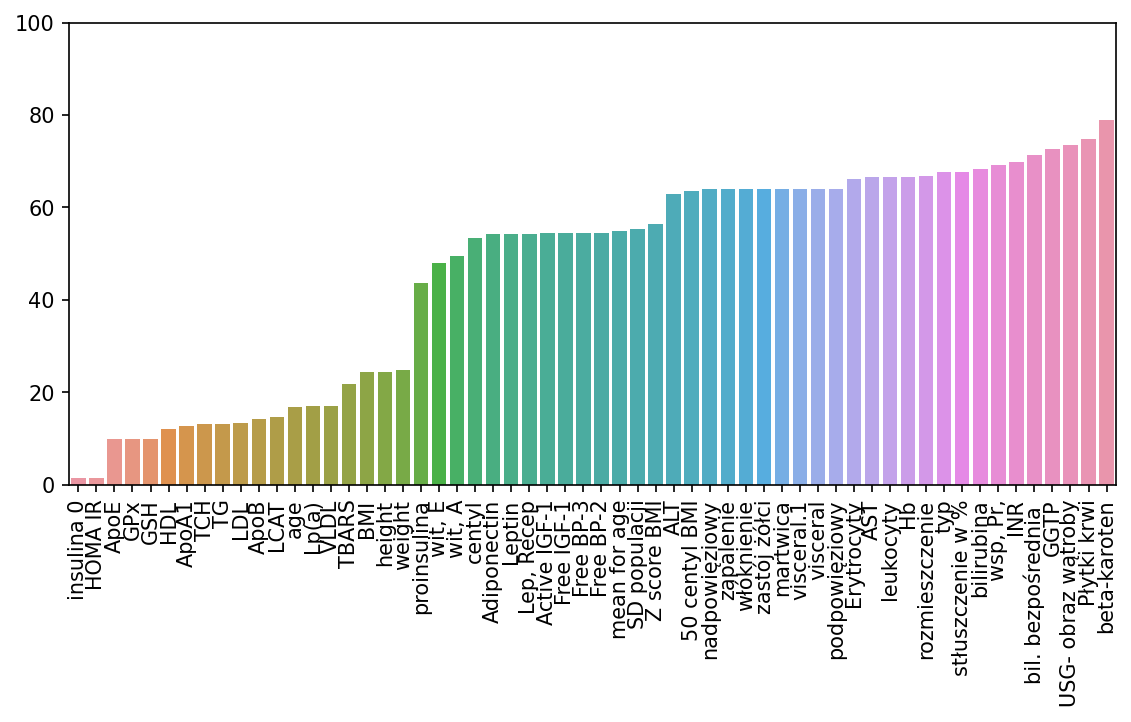

In [181]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

def draw_missing(dataset):
    ifg = plt.figure(figsize=(9,4),dpi=150)
    percent_nan = percent_missing(dataset)
    sns.barplot(x=percent_nan.index,y=percent_nan)
    plt.xticks(rotation=90)
    plt.ylim(0,100)

draw_missing(dataset)

In [182]:
dataset.describe()

,age,weight,height,BMI,mean for age,SD populacji,Z score BMI,50 centyl BMI,stłuszczenie w %,zapalenie,...,EPA,C22:2n-6,C22:4n-6,C22:5n-6,C24:0,C24:1n-9,C22:5n-3,DHA,AA/DGLA,DGLA/LA
count,229.000000,207.000000,208.000000,208.000000,124.000000,123.000000,120.000000,100.000000,89.000000,99.000000,...,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,13.482455,66.596353,1.606257,25.198620,19.299194,2.701382,0.855838,18.686000,52.865169,0.383838,...,0.364062,0.338989,0.355004,0.599156,0.221822,0.796567,0.721335,2.303855,2.299476,0.158831
std,3.391279,22.361129,0.202655,5.494137,1.769823,0.465180,3.836220,1.721112,23.989672,0.695570,...,0.306308,0.116597,0.083025,0.268206,0.100396,0.283803,0.269221,0.514975,0.777207,0.041243
min,2.270000,14.500000,0.670000,7.653061,15.540000,1.280000,-10.881119,15.400000,5.000000,0.000000,...,0.050000,0.100000,0.100000,0.100000,0.100000,0.210000,0.320000,1.310000,0.881664,0.069312
25%,11.789041,54.250000,1.540000,21.122453,17.900000,2.520000,-0.433835,17.450000,35.000000,0.000000,...,0.140000,0.250000,0.300000,0.375000,0.140000,0.610000,0.520000,2.010000,1.682791,0.128310
50%,14.000000,67.000000,1.657500,25.126759,19.630000,2.710000,1.743748,19.000000,50.000000,0.000000,...,0.190000,0.330000,0.360000,0.580000,0.190000,0.750000,0.680000,2.240000,2.170543,0.152644
75%,16.000000,81.000000,1.740000,28.648469,20.790000,2.930000,2.603780,20.100000,70.000000,1.000000,...,0.680000,0.405000,0.410000,0.855000,0.275000,0.930000,0.885000,2.580000,2.871609,0.184758
max,21.000000,127.300000,1.945000,40.429015,21.650000,3.300000,16.722513,21.500000,100.000000,3.000000,...,1.100000,0.990000,0.570000,1.160000,0.500000,2.570000,1.710000,3.990000,4.263959,0.282130


In [183]:
#For rows where there is no age or weight, put random age generated from normal distribution with mean age and standard deviation of age
np.random.seed(300464)
for set in [sick, obese, healthy]:
    mean_age = set[['age']].mean()
    std_age = set[['age']].std()
    for i, row in set.iterrows():
        (weight, age) = row[['weight','age']]
        if  pd.isnull(age):
            new_age = np.random.normal(mean_age,std_age)
            set.at[i,'age'] = new_age
        if (age < 5) and (weight > 40):
            new_age = np.random.normal(mean_age,std_age)
            set.at[i,'age'] = new_age
  

In [184]:
dataset = pd.concat((sick,healthy, obese))
dataset.describe()

,age,weight,height,BMI,mean for age,SD populacji,Z score BMI,50 centyl BMI,stłuszczenie w %,zapalenie,...,EPA,C22:2n-6,C22:4n-6,C22:5n-6,C24:0,C24:1n-9,C22:5n-3,DHA,AA/DGLA,DGLA/LA
count,275.000000,207.000000,208.000000,208.000000,124.000000,123.000000,120.000000,100.000000,89.000000,99.000000,...,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,13.615977,66.596353,1.606257,25.198620,19.299194,2.701382,0.855838,18.686000,52.865169,0.383838,...,0.364062,0.338989,0.355004,0.599156,0.221822,0.796567,0.721335,2.303855,2.299476,0.158831
std,3.113890,22.361129,0.202655,5.494137,1.769823,0.465180,3.836220,1.721112,23.989672,0.695570,...,0.306308,0.116597,0.083025,0.268206,0.100396,0.283803,0.269221,0.514975,0.777207,0.041243
min,2.270000,14.500000,0.670000,7.653061,15.540000,1.280000,-10.881119,15.400000,5.000000,0.000000,...,0.050000,0.100000,0.100000,0.100000,0.100000,0.210000,0.320000,1.310000,0.881664,0.069312
25%,11.816438,54.250000,1.540000,21.122453,17.900000,2.520000,-0.433835,17.450000,35.000000,0.000000,...,0.140000,0.250000,0.300000,0.375000,0.140000,0.610000,0.520000,2.010000,1.682791,0.128310
50%,14.000000,67.000000,1.657500,25.126759,19.630000,2.710000,1.743748,19.000000,50.000000,0.000000,...,0.190000,0.330000,0.360000,0.580000,0.190000,0.750000,0.680000,2.240000,2.170543,0.152644
75%,16.000000,81.000000,1.740000,28.648469,20.790000,2.930000,2.603780,20.100000,70.000000,1.000000,...,0.680000,0.405000,0.410000,0.855000,0.275000,0.930000,0.885000,2.580000,2.871609,0.184758
max,21.000000,127.300000,1.945000,40.429015,21.650000,3.300000,16.722513,21.500000,100.000000,3.000000,...,1.100000,0.990000,0.570000,1.160000,0.500000,2.570000,1.710000,3.990000,4.263959,0.282130


# Weight

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [186]:
def predict_weight(set, loop=0, plots = False):
    set_to_predict = set[set['weight'].isnull()][['age', 'weight']].drop('weight', axis = 1)
    set_train = set[set['weight'].notnull()][['age', 'weight']]

    assert set.shape[0] == set_to_predict.shape[0] + set_train.shape[0]

    X = set_train.drop('weight', axis = 1)
    y = set_train['weight']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=515)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    X_real = scaler.transform(set_to_predict)

    alphas = np.arange(0.001,10,0.01)
    ridge_cv_model = RidgeCV(alphas=alphas,scoring='neg_root_mean_squared_error',cv=4)
    ridge_cv_model.fit(X_train,y_train)

    test_predictions = ridge_cv_model.predict(X_test)

    MAE = mean_absolute_error(y_test,test_predictions)
    MSE = mean_squared_error(y_test,test_predictions)
    RMSE = np.sqrt(MSE)

    print(f'MAE: {MAE}\nRMSE: {RMSE}')

    real_predictions = ridge_cv_model.predict(X_real)

    set_to_predict = np.squeeze(set_to_predict)

    if plots:
        sns.scatterplot(x=set_to_predict, y=real_predictions)
        sns.scatterplot(data=set_train, x='age', y='weight')
        if loop == 0:
            plt.title('Sick')
        elif loop == 1:
            plt.title('Obese')
        elif loop == 2:
            plt.title('Healthy')
        plt.show()

    for i, row in set.iterrows():
        (weight, age) = row[['weight','age']]
        if  pd.isnull(weight):
            new_weight = ridge_cv_model.predict(scaler.transform(np.reshape(a = np.array(age),newshape = (1,-1))))

            set.at[i,'weight'] = new_weight


In [187]:
loop = 0 
for set in [sick, obese, healthy]:
    predict_weight(set, loop, False)
    loop +=1

MAE: 13.028519233008442
RMSE: 16.233277347136415


c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\m

MAE: 12.783036054044567
RMSE: 16.953857988712933


c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\m

MAE: 10.775008590477004
RMSE: 11.62326946981515


c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\m

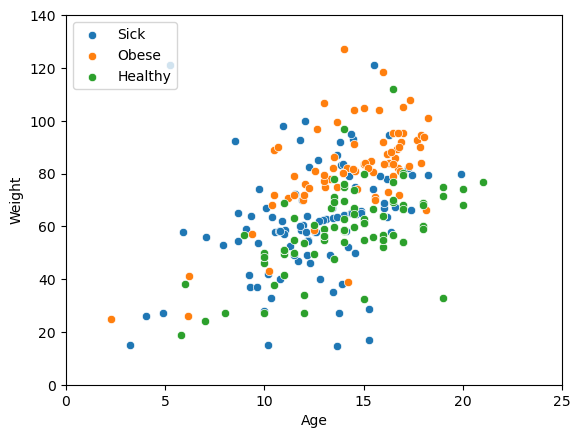

In [188]:

sns.scatterplot(data=sick, x = 'age', y='weight', label= 'Sick')
sns.scatterplot(data=obese, x = 'age', y='weight', label = 'Obese' )
sns.scatterplot(data=healthy, x = 'age', y='weight', label = 'Healthy')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.ylim((0,140))
plt.xlim((0,25))
plt.legend(loc=2)

In [189]:
dataset = pd.concat((sick,healthy, obese))
dataset.describe()

,age,weight,height,BMI,mean for age,SD populacji,Z score BMI,50 centyl BMI,stłuszczenie w %,zapalenie,...,EPA,C22:2n-6,C22:4n-6,C22:5n-6,C24:0,C24:1n-9,C22:5n-3,DHA,AA/DGLA,DGLA/LA
count,275.000000,275.000000,208.000000,208.000000,124.000000,123.000000,120.000000,100.000000,89.000000,99.000000,...,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,13.615977,66.448200,1.606257,25.198620,19.299194,2.701382,0.855838,18.686000,52.865169,0.383838,...,0.364062,0.338989,0.355004,0.599156,0.221822,0.796567,0.721335,2.303855,2.299476,0.158831
std,3.113890,20.236100,0.202655,5.494137,1.769823,0.465180,3.836220,1.721112,23.989672,0.695570,...,0.306308,0.116597,0.083025,0.268206,0.100396,0.283803,0.269221,0.514975,0.777207,0.041243
min,2.270000,14.500000,0.670000,7.653061,15.540000,1.280000,-10.881119,15.400000,5.000000,0.000000,...,0.050000,0.100000,0.100000,0.100000,0.100000,0.210000,0.320000,1.310000,0.881664,0.069312
25%,11.816438,55.450000,1.540000,21.122453,17.900000,2.520000,-0.433835,17.450000,35.000000,0.000000,...,0.140000,0.250000,0.300000,0.375000,0.140000,0.610000,0.520000,2.010000,1.682791,0.128310
50%,14.000000,65.103509,1.657500,25.126759,19.630000,2.710000,1.743748,19.000000,50.000000,0.000000,...,0.190000,0.330000,0.360000,0.580000,0.190000,0.750000,0.680000,2.240000,2.170543,0.152644
75%,16.000000,80.000000,1.740000,28.648469,20.790000,2.930000,2.603780,20.100000,70.000000,1.000000,...,0.680000,0.405000,0.410000,0.855000,0.275000,0.930000,0.885000,2.580000,2.871609,0.184758
max,21.000000,127.300000,1.945000,40.429015,21.650000,3.300000,16.722513,21.500000,100.000000,3.000000,...,1.100000,0.990000,0.570000,1.160000,0.500000,2.570000,1.710000,3.990000,4.263959,0.282130


# Height

In [190]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNetCV

In [191]:
def predict_height(set, loop, plots = False):
    
    set_to_predict = set[set['height'].isnull()][['age', 'weight', 'height']].drop('height', axis = 1)
    set_train = set[set['height'].notnull()][['age', 'weight', 'height']]

    assert set.shape[0] == set_to_predict.shape[0] + set_train.shape[0]
    
    X = set_train.drop(columns= 'height', axis = 1)
    y = set_train['height']
    polyniomial_transformer = PolynomialFeatures(degree=2, include_bias=False)
    polyniomial_transformer = polyniomial_transformer.fit(X)
    polynomial_features = polyniomial_transformer.transform(X)
    set_to_predict_poly = polyniomial_transformer.transform(set_to_predict)

    X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.1, random_state=515)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    X_real = scaler.transform(set_to_predict_poly)

    elasticnet = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)
    elasticnet.fit(X_train, y_train)    
    
    test_predictions = elasticnet.predict(X_test)

    MAE = mean_absolute_error(y_test,test_predictions)
    MSE = mean_squared_error(y_test,test_predictions)
    RMSE = np.sqrt(MSE)

    print(f'MAE: {MAE}\nRMSE: {RMSE}')

    real_predictions = elasticnet.predict(X_real)

    set_to_predict = np.squeeze(set_to_predict[['age']])

    if plots:
        sns.scatterplot(x=set_to_predict, y=real_predictions)
        sns.scatterplot(data=set_train, x='age', y='height')
        if loop == 0:
            plt.title('Sick')
        elif loop == 1:
            plt.title('Obese')
        elif loop == 2:
            plt.title('Healthy')
        plt.show()

    for i, row in set.iterrows():
        if not(pd.notnull(row['height'])):
            row_data = np.expand_dims((row[['age', 'weight']].values), axis = 0 )
            
            row_data_poly = polyniomial_transformer.transform(row_data)
            new_height = elasticnet.predict(scaler.transform( row_data_poly))
            set.at[i,'height'] = new_height
    
    

In [192]:
loop = 0 
for set in [sick, obese, healthy]:
    predict_height(set, loop)
    loop +=1

MAE: 0.08151068803519818
RMSE: 0.11065111766310165
MAE: 0.06741008953747651
RMSE: 0.07225008485784129


c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\K

MAE: 0.07401255022167498
RMSE: 0.07593653592232637


c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Kubi\anaconda3\envs\ml_course\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\K

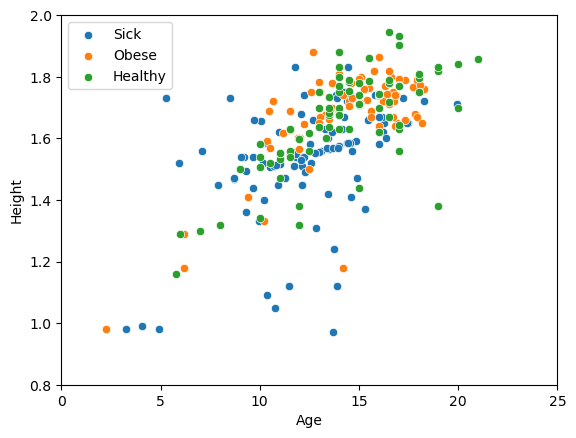

In [193]:

sns.scatterplot(data=sick, x = 'age', y='height', label= 'Sick')
sns.scatterplot(data=obese, x = 'age', y='height', label = 'Obese' )
sns.scatterplot(data=healthy, x = 'age', y='height', label = 'Healthy')
plt.xlabel('Age')
plt.ylabel('Height')
plt.ylim((0.8,2))
plt.xlim((0,25))
plt.legend(loc=2)

In [194]:
dataset = pd.concat((sick,healthy, obese))
dataset.describe()

,age,weight,height,BMI,mean for age,SD populacji,Z score BMI,50 centyl BMI,stłuszczenie w %,zapalenie,...,EPA,C22:2n-6,C22:4n-6,C22:5n-6,C24:0,C24:1n-9,C22:5n-3,DHA,AA/DGLA,DGLA/LA
count,275.000000,275.000000,275.000000,208.000000,124.000000,123.000000,120.000000,100.000000,89.000000,99.000000,...,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,13.615977,66.448200,1.616496,25.198620,19.299194,2.701382,0.855838,18.686000,52.865169,0.383838,...,0.364062,0.338989,0.355004,0.599156,0.221822,0.796567,0.721335,2.303855,2.299476,0.158831
std,3.113890,20.236100,0.184666,5.494137,1.769823,0.465180,3.836220,1.721112,23.989672,0.695570,...,0.306308,0.116597,0.083025,0.268206,0.100396,0.283803,0.269221,0.514975,0.777207,0.041243
min,2.270000,14.500000,0.670000,7.653061,15.540000,1.280000,-10.881119,15.400000,5.000000,0.000000,...,0.050000,0.100000,0.100000,0.100000,0.100000,0.210000,0.320000,1.310000,0.881664,0.069312
25%,11.816438,55.450000,1.550000,21.122453,17.900000,2.520000,-0.433835,17.450000,35.000000,0.000000,...,0.140000,0.250000,0.300000,0.375000,0.140000,0.610000,0.520000,2.010000,1.682791,0.128310
50%,14.000000,65.103509,1.660000,25.126759,19.630000,2.710000,1.743748,19.000000,50.000000,0.000000,...,0.190000,0.330000,0.360000,0.580000,0.190000,0.750000,0.680000,2.240000,2.170543,0.152644
75%,16.000000,80.000000,1.740000,28.648469,20.790000,2.930000,2.603780,20.100000,70.000000,1.000000,...,0.680000,0.405000,0.410000,0.855000,0.275000,0.930000,0.885000,2.580000,2.871609,0.184758
max,21.000000,127.300000,1.945000,40.429015,21.650000,3.300000,16.722513,21.500000,100.000000,3.000000,...,1.100000,0.990000,0.570000,1.160000,0.500000,2.570000,1.710000,3.990000,4.263959,0.282130


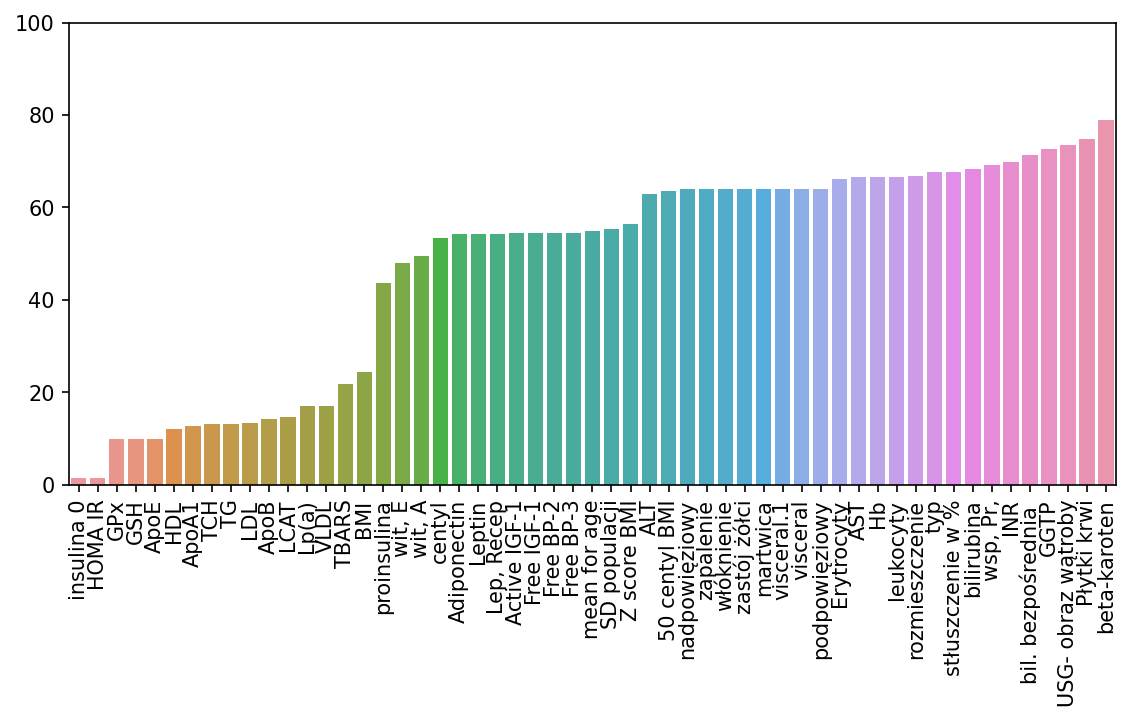

In [195]:
draw_missing(dataset)

In [200]:
for column in ['insulina 0','HOMA IR']:
    dataset[column] = dataset.groupby('label')[column].transform(lambda val: val.fillna(val.mean()))

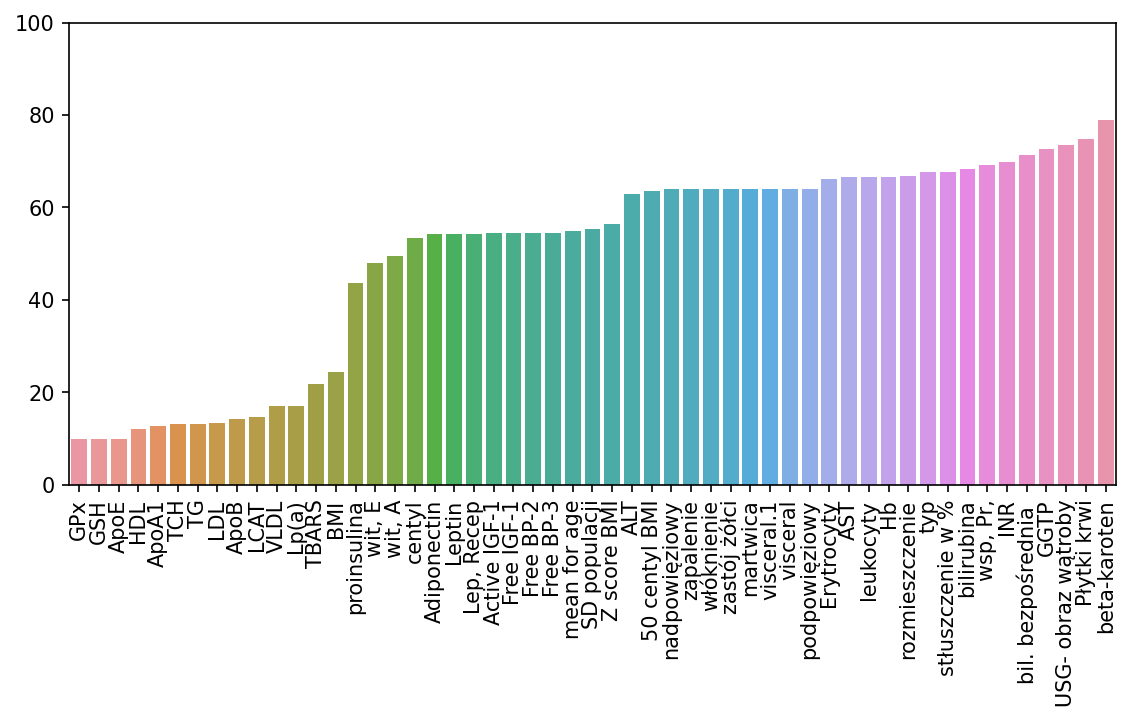

In [201]:
draw_missing(dataset)